In [4]:
# Downloading Required libraries and reading SongsLyrics.csv file

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import string

[nltk_data] Downloading package punkt to C:\Users\Gagan
[nltk_data]     Rangu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gagan
[nltk_data]     Rangu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
dataset = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Mood Classification/SongLyrics.csv',encoding ='cp1252')
dataset.head()

Track_Id   Artist    Genre                          Title  \
0         1     4Him      Pop  Strange Way To Save The World   
1         2  50 Cent  Hip-Hop                     Candy Shop   
2         3  50 Cent  Hip-Hop                        My Life   
3         4  50 Cent  Hip-Hop                    If I Cannot   
4         5  50 Cent  Hip-Hop                What Up Gangsta   

                                              Lyrics    Mood  
0  I'm sure he must have been surprised\nAt where...   Happy  
1  Yeah, uh-huh\nSo seductive\n\nI'll take you to...   Relax  
2  My life, my life\nMakes me wanna run away\nThe...     Sad  
3  Yeah, ha ha, yeah, yeah\n\nIf I can't do it, h...  Angry   
4  G-Unit (BO!), we in here (BO!)\nWe can get the...  Angry

In [37]:
# Finding the total number of rows and columns in data

dataset.shape

(401, 6)

In [38]:
#To find number of lyrics, genre, and artist count in each mood category

dataset.groupby(dataset['Mood']).count()

Track_Id  Artist  Genre  Title  Lyrics
Mood                                          
Angry         91      91     91     91      91
Happy        103     103    103    103     103
Relax         93      93     92     93      92
Sad          114     114    114    114     114

In [39]:
#To find number of lyrics, genre, and mood count in each Artist category

dataset.groupby(dataset['Artist']).count().head(10)

Track_Id  Genre  Title  Lyrics  Mood
Artist                                             
4Him                  1      1      1       1     1
50 Cent               4      4      4       4     4
ATB                   1      1      1       1     1
Adele                 2      2      2       2     2
Alan Jackson          8      8      8       8     8
Alec Benjamin         1      1      1       1     1
Ali Gatie             1      1      1       1     1
Alicia Keys           1      1      1       1     1
Anderson Pak          1      1      1       1     1
Anne Marie            1      1      1       1     1

In [40]:
#To find number of lyrics, artist, and artist count in each Genre category

dataset.groupby(dataset['Genre']).count()

Track_Id  Artist  Title  Lyrics  Mood
Genre                                                  
Blue-eyed Soul           8       8      8       8     8
Contemporary R&B        31      31     31      31    31
Country                 62      62     62      62    62
Dream Pop                4       4      4       4     4
EDM                      8       8      8       8     8
Folk                     5       5      5       5     5
Hip-Hop                122     122    122     122   122
Indie Pop               14      14     14      14    14
Latin Pop                1       1      1       1     1
Lo-fi Music              1       1      1       1     1
Pop                     44      44     44      44    44
R                        3       3      3       3     3
Reggae                  19      19     19      19    19
Rock                    77      77     77      77    77
pop                      1       1      1       1     1

In [ ]:
# Section 1 - Data Pre Processing : 

In [41]:
# Removing all rows having any blank cells

dataset=dataset.dropna(axis=0)
dataset = dataset.reset_index(drop=True)

In [42]:
# Finding the total number of rows and columns in data after removing blank cells

dataset.shape

(400, 6)

In [43]:
#Finding Missing Values in all columns

for col in dataset.columns:
    print(col, dataset[col].isnull().sum())

Track_Id 0
Artist 0
Genre 0
Title 0
Lyrics 0
Mood 0


In [44]:
# Replacing the data havinh white space and blank with NAN

dataset['Lyrics'].replace('', np.nan, inplace=True)
dataset['Lyrics'].replace(' ', np.nan, inplace=True)
print(dataset)

     Track_Id        Artist    Genre                          Title  \
0           1          4Him      Pop  Strange Way To Save The World   
1           2       50 Cent  Hip-Hop                     Candy Shop   
2           3       50 Cent  Hip-Hop                        My Life   
3           4       50 Cent  Hip-Hop                    If I Cannot   
4           5       50 Cent  Hip-Hop                What Up Gangsta   
..        ...           ...      ...                            ...   
395       398  XXXTentacion  Hip-Hop                            Sad   
396       399  XXXTentacion  Hip-Hop                      Moonlight   
397       400  Zara Larsson      Pop                      Lush Life   
398       401  Ziggy Marley   Reggae                     Lighthouse   
399       402  Sister Hazel     Rock                 Vacation Rain    

                                                Lyrics    Mood  
0    I'm sure he must have been surprised\nAt where...   Happy  
1    Yeah, uh-huh

In [45]:
#Converting Lyrics column to String datatype 

dataset['Lyrics'].astype(str)
dataset['Lyrics'].head(5)

0    I'm sure he must have been surprised\nAt where...
1    Yeah, uh-huh\nSo seductive\n\nI'll take you to...
2    My life, my life\nMakes me wanna run away\nThe...
3    Yeah, ha ha, yeah, yeah\n\nIf I can't do it, h...
4    G-Unit (BO!), we in here (BO!)\nWe can get the...
Name: Lyrics, dtype: object

In [46]:
# Tokenizing the words , removing the stopwords from the sentences and finding the stem form of the words

from sklearn.feature_extraction import stop_words
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer

In [47]:
ps = PorterStemmer()
stop_words = set(stop_words.ENGLISH_STOP_WORDS) 

tokenize = [] 
stopwordremoved = []
for index, i in enumerate(dataset['Lyrics']):
    word_tokens = word_tokenize(i) 
    tokenize.append(word_tokens) 
    filtered_sentence = []
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(ps.stem(w))
    if filtered_sentence == []:
        stopwordremoved.append(np.nan)
    else :
        stopwordremoved.append(filtered_sentence)
    print(word_tokens,index)
    print(filtered_sentence)

['I', "'m", 'sure', 'he', 'must', 'have', 'been', 'surprised', 'At', 'where', 'this', 'road', 'had', 'taken', 'him', 'Cause', 'never', 'in', 'a', 'million', 'lives', 'Would', 'he', 'have', 'dreamed', 'of', 'Bethlehem', 'CHANNEL', 'And', 'standing', 'at', 'the', 'manger', 'He', 'saw', 'with', 'his', 'own', 'eyes', 'The', 'message', 'from', 'the', 'angel', 'come', 'to', 'life', 'And', 'Joseph', 'said', 'CHORUS', 'Why', 'me', ',', 'I', "'m", 'just', 'a', 'simple', 'man', 'of', 'trade', 'Why', 'Him', 'with', 'all', 'the', 'rulers', 'in', 'the', 'world', 'Why', 'here', 'inside', 'this', 'stable', 'filled', 'with', 'hay', 'Why', 'her', ',', 'she', "'s", 'just', 'an', 'ordinary', 'girl', 'Now', 'I', "'m", 'not', 'one', 'to', 'second', 'guess', 'What', 'angels', 'have', 'to', 'say', 'But', 'this', 'is', 'such', 'a', 'strange', 'way', 'to', 'save', 'the', 'World', 'To', 'think', 'of', 'how', 'it', 'could', 'have', 'been', 'If', 'Jesus', 'had', 'come', 'as', 'He', 'deserved', 'There', 'would', '

['This', 'hit', ',', 'that', 'ice', 'cold', 'Michelle', 'Pfeiffer', ',', 'that', 'white', 'gold', 'This', 'one', 'for', 'them', 'hood', 'girls', 'Them', 'good', 'girls', 'straight', 'masterpieces', 'Stylin', "'", ',', 'wilin', "'", ',', 'livin', "'", 'it', 'up', 'in', 'the', 'city', 'Got', 'Chucks', 'on', 'with', 'Saint', 'Laurent', 'Got', 'ta', 'kiss', 'myself', ',', 'I', "'m", 'so', 'pretty', 'I', "'m", 'too', 'hot', '(', 'hot', 'damn', ')', 'Called', 'a', 'police', 'and', 'a', 'fireman', 'I', "'m", 'too', 'hot', '(', 'hot', 'damn', ')', 'Make', 'a', 'dragon', 'wan', 'na', 'retire', 'man', 'I', "'m", 'too', 'hot', '(', 'hot', 'damn', ')', 'Say', 'my', 'name', 'you', 'know', 'who', 'I', 'am', 'I', "'m", 'too', 'hot', '(', 'hot', 'damn', ')', 'And', 'my', 'band', "'bout", 'that', 'money', ',', 'break', 'it', 'down', 'Girls', 'hit', 'your', 'hallelujah', '(', 'whoo', ')', 'Girls', 'hit', 'your', 'hallelujah', '(', 'whoo', ')', 'Girls', 'hit', 'your', 'hallelujah', '(', 'whoo', ')', "'Ca

['Have', 'you', 'ever', 'felt', 'a', 'thunder', 'inside', 'your', 'heart', 'Holding', 'on', 'to', 'all', 'the', 'shit', 'that', "'s", 'gon', 'na', 'tear', 'you', 'apart', 'If', 'you', 'ca', "n't", 'free', 'yourself', 'there', 'ai', "n't", 'no', 'brand', 'new', 'start', 'So', 'you', 'got', 'ta', 'let', 'go', 'I', 'once', 'had', 'a', 'friend', 'who', 'lived', 'in', 'an', 'eastern', 'town', 'He', 'moved', 'back', 'home', 'and', 'called', 'and', 'started', 'hanging', 'around', 'But', 'every', 'time', 'I', 'tried', 'to', 'talk', 'to', 'him', 'he', "'d", 'put', 'me', 'down', 'So', 'I', 'got', 'ta', 'let', 'go', 'Nobody', 'knows', 'who', 'you', 'are', 'Nobody', 'cares', 'who', 'you', 'are', 'Nobody', 'knows', 'why', 'you', 'feel', 'Disconnected', '.', '(', 'Disconnected', ')', 'Disconnected', '.', 'Maybe', 'it', "'s", 'the', 'way', 'I', "'m", 'told', 'I', 'ought', 'to', 'look', 'and', 'feel', 'Maybe', 'it', "'s", 'because', 'my', 'mind', 'is', 'so', 'easy', 'to', 'steal', 'That', 'I', "'m", '

['What', "'s", 'up', '?', 'Been', 'a', 'minute', 'since', 'we', 'kicked', 'it', ',', 'you', "'ve", 'been', 'caught', 'up', 'With', 'them', 'bitches', ',', 'I', 'do', "n't", 'get', 'it', ',', 'you', "'re", 'a', 'star', 'love', 'You', 'should', "n't", 'have', 'to', 'deal', 'with', 'that', 'I', "'d", 'never', 'make', 'you', 'feel', 'like', 'that', ',', "'cause", '...', 'I', 'love', 'me', ',', 'I', 'love', 'me', 'enough', 'for', 'the', 'both', 'of', 'us', 'That', "'s", 'why', 'you', 'trust', 'me', ',', 'I', 'know', 'you', 'been', 'through', 'more', 'than', 'most', 'of', 'us', 'So', 'what', 'are', 'you', '?', 'What', 'are', 'you', ',', 'what', 'are', 'you', 'so', 'afraid', 'of', '?', 'Darling', 'you', ',', 'you', 'give', 'but', 'you', 'can', 'not', 'take', 'love', 'Yeah', ',', 'I', 'needed', 'to', 'hear', 'that', 'shit', ',', 'I', 'hate', 'when', 'you', "'re", 'submissive', 'Passive', 'aggressive', 'when', 'we', "'re", 'texting', ',', 'I', 'feel', 'the', 'distance', 'I', 'look', 'around', '

['It', "'s", 'like', 'I', "'m", 'in', 'this', 'dirt', ',', 'digging', 'up', 'old', 'hurt', 'Tried', 'everything', 'to', 'get', 'my', 'mind', 'off', 'you', ',', 'it', 'wo', "n't", 'work', 'All', 'it', 'takes', 'is', 'one', 'song', 'on', 'the', 'radio', ',', "you're", 'Right', 'back', 'on', 'it', ',', 'reminding', 'me', 'all', 'over', 'again', 'How', 'you', 'fucking', 'just', 'brushed', 'me', 'off', 'and', 'left', 'me', 'so', 'burnt', 'Spent', 'a', 'lot', 'of', 'time', 'tryin', "'", 'to', 'soul', 'search', 'Maybe', 'I', 'needed', 'to', 'grow', 'up', 'a', 'little', 'first', 'Well', ',', 'looks', 'like', 'I', 'hit', 'a', 'growth', 'spurt', 'But', 'I', "'m", 'coming', 'for', 'closure', 'Do', "n't", 'suppose', 'an', 'explanation', 'I', "'m", 'owed', ',', 'for', 'The', 'way', 'that', 'you', 'turned', 'your', 'back', 'on', 'me', 'Just', 'when', 'I', 'may', 'have', 'needed', 'you', 'most', 'Oh', ',', 'you', 'thought', 'it', 'was', 'over', '?', 'You', 'could', 'just', 'close', 'the', 'Chapter', 

['Hollywood', 'Cole', ',', 'go', 'Ay', 'Hollywood', ',', 'ay', 'Hollywood', 'Cole', ',', 'go', 'My', 'nigga', 'done', 'went', 'Hollywood', 'You', 'wan', 'na', 'know', 'just', 'where', 'I', "'m", 'at', ',', 'well', 'let', 'me', 'tell', 'you', "'bout", 'it', 'I', 'put', 'my', 'city', 'on', 'the', 'map', 'but', 'let', 'me', 'tell', 'you', "'bout", 'it', 'They', 'tryna', 'say', 'I', 'ca', "n't", 'come', 'back', ',', 'ayy', 'let', 'me', 'tell', 'you', "'bout", 'it', 'Man', 'fuck', 'them', 'niggas', 'I', 'come', 'back', ',', 'ayy', 'let', 'me', 'tell', 'you', "'bout", 'it', 'I', 'wan', 'na', 'tell', 'you', "'bout", 'it', ':', 'hands', 'up', ',', 'everybody', 'run', 'Cole', 'outside', 'and', 'he', 'say', 'he', 'got', 'a', 'gun', 'Niggas', 'like', '``', "''", 'Man', 'that', "'s", 'what', 'everybody', 'said', "''", "''", 'Go', 'and', 'pop', 'the', 'trunk', 'and', 'everybody', 'dead', 'Everybody', 'scared', 'of', 'the', 'nigga', ',', 'aware', 'that', 'the', 'nigga', 'is', 'better', 'All', 'my', 

['Man', ',', 'I', 'can', 'understand', 'how', 'it', 'might', 'be', 'Kinda', 'hard', 'to', 'love', 'a', 'girl', 'like', 'me', 'I', 'do', "n't", 'blame', 'you', 'much', 'for', 'wanting', 'to', 'be', 'free', 'I', 'just', 'wanted', 'you', 'to', 'know', 'Swizz', 'told', 'me', 'let', 'the', 'beat', 'rock', 'For', 'all', 'my', 'Southside', 'niggas', 'that', 'know', 'me', 'best', 'I', 'feel', 'like', 'me', 'and', 'Taylor', 'might', 'still', 'have', 'sex', 'Why', '?', 'I', 'made', 'that', 'bitch', 'famous', '(', 'Goddamn', ')', 'I', 'made', 'that', 'bitch', 'famous', 'For', 'all', 'the', 'girls', 'that', 'got', 'dick', 'from', 'Kanye', 'West', 'If', 'you', 'see', "'em", 'in', 'the', 'streets', 'give', "'em", 'Kanye', "'s", 'best', 'Why', '?', 'They', 'mad', 'they', 'ai', "n't", 'famous', '(', 'Goddamn', ')', 'They', 'mad', 'they', 'still', 'nameless', '(', 'Talk', 'that', 'talk', ',', 'man', ')', 'Her', 'man', 'in', 'the', 'store', 'tryna', 'try', 'his', 'best', 'But', 'he', 'just', 'ca', "n't"

['I', 'got', 'a', 'story', 'to', 'tell', ',', 'you', 'know', 'that', 'I', 'cherish', 'thee', 'Hope', 'it', 'ai', "n't", 'too', 'many', 'feelings', 'involved', 'I', 'see', 'niggas', 'in', 'this', 'bitch', 'Stuntin', "'", ',', 'poppin', "'", 'bottles', 'Gettin', "'", 'drunk', 'with', 'these', 'bitches', 'And', 'when', 'they', 'leave', 'they', 'get', 'followed', 'Fall', 'asleep', 'with', 'that', 'bitch', 'And', 'really', 'do', "n't", 'know', 'much', 'about', 'her', 'Then', 'she', 'let', 'us', 'in', ',', 'we', 'take', 'all', 'of', 'your', 'shit', 'And', 'when', 'you', 'wake', 'up', ',', 'she', 'help', 'you', 'try', 'to', 'find', 'it', ',', 'I', 'love', 'it', 'I', 'be', 'with', 'bitches', 'that', 'be', 'with', 'bitches', 'That', 'be', 'with', 'niggas', 'with', 'riches', 'I', 'tell', 'her', ',', '``', 'Get', 'him', ',', "''", 'she', 'say', ',', '``', 'I', 'got', 'you', "''", 'I', 'say', ',', '``', 'No', ',', 'bitch', ',', 'I', 'said', 'get', 'him', "''", 'And', 'they', 'so', 'pretty', ',', '

['Me', 'not', 'working', 'hard', '?', 'Yeah', ',', 'right', ',', 'picture', 'that', 'with', 'a', 'Kodak', 'Or', ',', 'better', 'yet', ',', 'go', 'to', 'Times', 'Square', 'Take', 'a', 'picture', 'of', 'me', 'with', 'a', 'Kodak', 'Took', 'my', 'life', 'from', 'negative', 'to', 'positive', 'I', 'just', 'want', "y'all", 'know', 'that', 'And', 'tonight', ',', 'let', "'s", 'enjoy', 'life', 'Pitbull', ',', 'Nayer', ',', 'Ne-Yo', ',', 'tell', 'us', 'right', 'Tonight', 'I', 'want', 'all', 'of', 'you', 'tonight', 'Give', 'me', 'everything', 'tonight', 'For', 'all', 'we', 'know', 'we', 'might', 'not', 'get', 'tomorrow', 'Let', "'s", 'do', 'it', 'tonight', 'Do', "n't", 'care', 'what', 'they', 'say', 'All', 'the', 'games', 'they', 'play', 'Nothing', 'is', 'enough', "'Til", 'they', 'handle', 'love', '(', 'let', "'s", 'do', 'it', 'tonight', ')', 'I', 'want', 'you', 'tonight', 'I', 'want', 'you', 'to', 'stay', 'I', 'want', 'you', 'tonight', 'Grab', 'somebody', 'sexy', ',', 'tell', "'em", 'hey', 'Give'

['Black', 'side', 'Russian', '(', 'Ganja', '!', ')', 'Head', 'concussion', '*', '(', 'Yo', 'Tarrus', ')', '*', 'Well', ',', 'who', 'cyan', 'hear', 'dem', 'a', 'go', 'feel', 'mi', 'seh', '?', 'When', 'you', 'finga', 'mash', 'no', 'badda', 'cry', 'mi', 'seh', 'Alright', 'den', 'Dem', 'big', 'inna', 'body', 'and', 'will', 'tell', 'yuh', 'dem', 'ready', 'Mi', 'nuh', 'need', 'no', 'glass', 'fi', 'see', 'dem', 'force', 'ripe', 'And', 'thru', "'", 'bad', 'company', 'some', 'likkle', 'pickney', 'Nah', 'tek', ',', 'no', 'talk', ',', 'a', 'straight', 'road', ',', 'a', 'street', 'life', 'Mama', 'likkle', 'princess', 'gone', 'bad', 'Daddy', "'s", 'likkle', 'angel', 'bruk', 'out', 'Mama', 'likkle', 'pearl', ',', 'tell', 'mi', 'Seh', 'she', 'ready', 'fi', 'di', 'world', ',', 'walkin', "'", 'out', 'Just', 'anodda', 'good', 'girl', 'gone', 'bad', 'Once', 'she', 'was', 'a', 'good', 'girl', 'but', 'now', 'she', 'gone', 'bad', 'Story', 'of', 'a', 'good', 'girl', 'gone', 'bad', 'And', 'she', 'do', "n't", 

In [48]:
# Storing the tokenized and sentences having no stopwords in the dataset

dataset['TokenizeWords']=tokenize
dataset['StopWordsRemoved']=stopwordremoved
dataset=dataset.dropna()
dataset = dataset.reset_index(drop=True)

In [49]:
# Detokizing the clean data to perform the Vectorization

from nltk.tokenize.treebank import TreebankWordDetokenizer

finaldataset=[]
for index, i in enumerate(dataset['StopWordsRemoved']):
    finaldataset.append(TreebankWordDetokenizer().detokenize(i))

In [50]:
dataset['Final_Lyrics']=finaldataset
dataset

Track_Id        Artist    Genre                          Title  \
0           1          4Him      Pop  Strange Way To Save The World   
1           2       50 Cent  Hip-Hop                     Candy Shop   
2           3       50 Cent  Hip-Hop                        My Life   
3           4       50 Cent  Hip-Hop                    If I Cannot   
4           5       50 Cent  Hip-Hop                What Up Gangsta   
..        ...           ...      ...                            ...   
395       398  XXXTentacion  Hip-Hop                            Sad   
396       399  XXXTentacion  Hip-Hop                      Moonlight   
397       400  Zara Larsson      Pop                      Lush Life   
398       401  Ziggy Marley   Reggae                     Lighthouse   
399       402  Sister Hazel     Rock                 Vacation Rain    

                                                Lyrics    Mood  \
0    I'm sure he must have been surprised\nAt where...   Happy   
1    Yeah, uh-huh\nSo seductive\n\nI'll take you to...   Relax   
2    My life, my life\nMakes me wanna run away\nThe...     Sad   
3    Yeah, ha ha, yeah, yeah\n\nIf I can't do it, h...  Angry    
4    G-Unit (BO!), we in here (BO!)\nWe can get the...  Angry    
..                                                 ...     ...   
395  Who am I? Someone that's afraid to let go, uh\...     Sad   
396  Yeah\nSpotlight, uh, moonlight, uh\nNigga, why...     Sad   
397  I live my day as if it was the last\nLive my d...   Happy   
398  Hey sister, the emotions have gone cold\nAnd a...     Sad   
399  I shut my eyes and it all comes racing in\nEve...   Happy   

                                         TokenizeWords  \
0    [I, 'm, sure, he, must, have, been, surprised,...   
1    [Yeah, ,, uh-huh, So, seductive, I, 'll, take,...   
2    [My, life, ,, my, life, Makes, me, wan, na, ru...   
3    [Yeah, ,, ha, ha, ,, yeah, ,, yeah, If, I, ca,...   
4    [G-Unit, (, BO, !, ), ,, we, in, here, (, BO, ...   
..                                                 ...   
395  [Who, am, I, ?, Someone, that, 's, afraid, to,...   
396  [Yeah, Spotlight, ,, uh, ,, moonlight, ,, uh, ...   
397  [I, live, my, day, as, if, it, was, the, last,...   
398  [Hey, sister, ,, the, emotions, have, gone, co...   
399  [I, shut, my, eyes, and, it, all, comes, racin...   

                                      StopWordsRemoved  \
0    [I, 'm, sure, surpris, At, road, taken, caus, ...   
1    [yeah, ,, uh-huh, So, seduct, I, 'll, candi, s...   
2    [My, life, ,, life, make, wan, na, run, away, ...   
3    [yeah, ,, ha, ha, ,, yeah, ,, yeah, If, I, ca,...   
4    [g-unit, (, BO, !, ), ,, (, BO, !, ), We, dram...   
..                                                 ...   
395  [who, I, ?, someon, 's, afraid, let, ,, uh, yo...   
396  [yeah, spotlight, ,, uh, ,, moonlight, ,, uh, ...   
397  [I, live, day, live, day, past, doin, ', nite,...   
398  [hey, sister, ,, emot, gone, cold, and, miss, ...   
399  [I, shut, eye, come, race, everytim, rain, ,, ...   

                                          Final_Lyrics  
0    I'm sure surpris At road taken caus million li...  
1    yeah, uh-huh So seduct I'll candi shop I'll le...  
2    My life, life make wannarun away there's place...  
3    yeah, ha ha, yeah, yeah If I can't, homi, can'...  
4    g-unit (BO!), (BO!) We drama popn't care (BO! ...  
..                                                 ...  
395  who I? someon's afraid let, uh you decid ,'re ...  
396  yeah spotlight, uh, moonlight, uh nigga, tripp...  
397  I live day live day past doin' nite, summer do...  
398  hey sister, emot gone cold and miss where rive...  
399  I shut eye come race everytim rain, I feel ski...  

[400 rows x 9 columns]

In [51]:
# Storing the final data in the CSV File

dataset.to_csv(r'C:/Users/Gagan Rangu/Desktop/Final_Dataset.csv',encoding = 'utf-8-sig')

In [76]:
# Section - 2 : Data Visualization

In [5]:
# Reading pre-processed dataset Final_Lyrics.csv

Dataset1 = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Final_Dataset.csv',encoding ='utf-8')
Dataset1.head()

Unnamed: 0  Track_Id   Artist    Genre                          Title  \
0           0         1     4Him      Pop  Strange Way To Save The World   
1           1         2  50 Cent  Hip-Hop                     Candy Shop   
2           2         3  50 Cent  Hip-Hop                        My Life   
3           3         4  50 Cent  Hip-Hop                    If I Cannot   
4           4         5  50 Cent  Hip-Hop                What Up Gangsta   

                                              Lyrics    Mood  \
0  I'm sure he must have been surprised\nAt where...   Happy   
1  Yeah, uh-huh\nSo seductive\n\nI'll take you to...   Relax   
2  My life, my life\nMakes me wanna run away\nThe...     Sad   
3  Yeah, ha ha, yeah, yeah\n\nIf I can't do it, h...  Angry    
4  G-Unit (BO!), we in here (BO!)\nWe can get the...  Angry    

                                       TokenizeWords  \
0  ['I', "'m", 'sure', 'he', 'must', 'have', 'bee...   
1  ['Yeah', ',', 'uh-huh', 'So', 'seductive', 'I'...   
2  ['My', 'life', ',', 'my', 'life', 'Makes', 'me...   
3  ['Yeah', ',', 'ha', 'ha', ',', 'yeah', ',', 'y...   
4  ['G-Unit', '(', 'BO', '!', ')', ',', 'we', 'in...   

                                    StopWordsRemoved  \
0  ['I', "'m", 'sure', 'surpris', 'At', 'road', '...   
1  ['yeah', ',', 'uh-huh', 'So', 'seduct', 'I', "...   
2  ['My', 'life', ',', 'life', 'make', 'wan', 'na...   
3  ['yeah', ',', 'ha', 'ha', ',', 'yeah', ',', 'y...   
4  ['g-unit', '(', 'BO', '!', ')', ',', '(', 'BO'...   

                                        Final_Lyrics  
0  I'm sure surpris At road taken caus million li...  
1  yeah, uh-huh So seduct I'll candi shop I'll le...  
2  My life, life make wannarun away there's place...  
3  yeah, ha ha, yeah, yeah If I can't, homi, can'...  
4  g-unit (BO!), (BO!) We drama popn't care (BO! ...

In [262]:
#Converting Lyrics column to String datatype 

Dataset1['Final_Lyrics'].astype(str)
Dataset1['Final_Lyrics'].head(10)

0    I'm sure surpris At road taken caus million li...
1    yeah, uh-huh So seduct I'll candi shop I'll le...
2    My life, life make wannarun away there's place...
3    yeah, ha ha, yeah, yeah If I can't, homi, can'...
4    g-unit (BO!), (BO!) We drama popn't care (BO! ...
5    I heard're settl that girl're marri I heard dr...
6    hello ,'s I wonder year'd like meet To they sa...
7    the sun hot old clock movin' slow An' I work d...
8    On hill far away stood old rug cross the emble...
9    If I survey good thing come If I count bless s...
Name: Final_Lyrics, dtype: object

In [274]:
# Grouping the data to find out the number of comments after pre-processing

Dataset1.groupby(Dataset1['Mood']).count()

Unnamed: 0  Track_Id  Artist  Genre  Title  Lyrics  TokenizeWords  \
Mood                                                                        
Angry           91        91      91     91     91      91             91   
Happy          103       103     103    103    103     103            103   
Relax           92        92      92     92     92      92             92   
Sad            114       114     114    114    114     114            114   

        StopWordsRemoved  Final_Lyrics  word_length  
Mood                                                 
Angry                 91            91           91  
Happy                103           103          103  
Relax                 92            92           92  
Sad                  114           114          114

Text(0.5, 1.0, 'Distribution of word count in Lyrics')

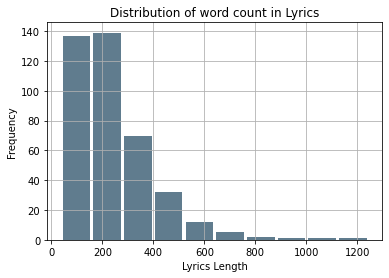

In [156]:
#Distribution of Word Count

import string

Lyrics_length = [] 

# fetches the number of words in each song
for index, i in enumerate(Dataset1['Final_Lyrics']):
    res = len(i.split())
    Lyrics_length.append(res)

import matplotlib.pyplot as plt

Lyrics_length
Dataset1['word_length']=Lyrics_length

# displays the word lengths as histogram 
Dataset1['word_length'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.xlabel('Lyrics Length')
plt.ylabel('Frequency')
plt.title('Distribution of word count in Lyrics')

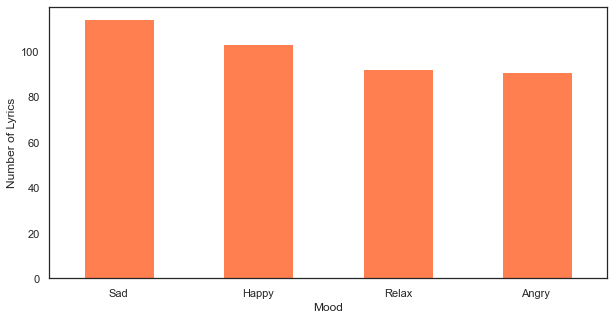

In [273]:
# Displayes the number of Lyrics in each Mood 

categories=Dataset1.groupby('Mood')
plt.figure(figsize=(10,5))
categories.size().sort_values(ascending=False).plot.bar(color='coral')
plt.xticks(rotation=360)
plt.xlabel("Mood")
plt.ylabel("Number of Lyrics")
plt.show()

In [277]:
# Mood By Genre Distribution

gclass = Dataset1.groupby(['Genre', 'Mood']).size().unstack()
print(gclass)
fig = plt.figure(figsize=(10,4))
sns.set(style="white")
pos = np.arange(1,13)

Mood              Angry   Happy  Relax   Sad
Genre                                       
Blue-eyed Soul       1.0    NaN    4.0   3.0
Contemporary R&B     7.0   15.0    3.0   6.0
Country              7.0    2.0   30.0  23.0
Dream Pop            NaN    1.0    3.0   NaN
EDM                  NaN    7.0    NaN   1.0
Folk                 1.0    NaN    3.0   1.0
Hip-Hop             50.0   18.0   19.0  35.0
Indie Pop            1.0    2.0    3.0   8.0
Latin Pop            NaN    NaN    NaN   1.0
Lo-fi Music          NaN    NaN    NaN   1.0
Pop                  2.0   25.0    9.0   8.0
R                    1.0    1.0    1.0   NaN
Reggae               6.0    1.0    7.0   5.0
Rock                15.0   30.0   10.0  22.0
pop                  NaN    1.0    NaN   NaN


<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'Top 5 most used words')

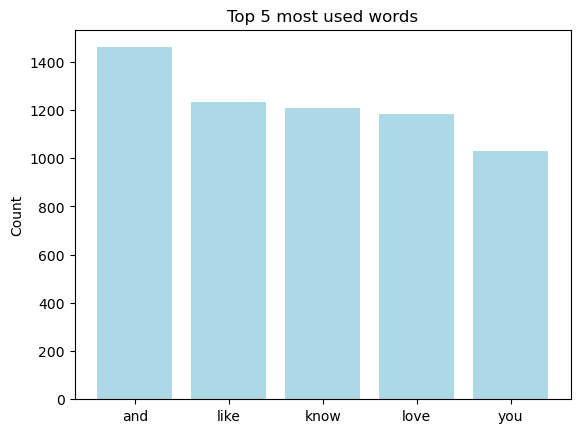

In [233]:
# This method is used to find the top 5 unigram words in the dataset

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(Dataset1['Final_Lyrics'], 5)
df1 = pd.DataFrame(common_words, columns = ['Final_Lyrics' , 'count'])

# This displays the top 5 words with their count in bar plot
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.bar(df1['Final_Lyrics'], df1['count'], align='center',color='Lightblue')
plt.xticks(df1.Final_Lyrics)
plt.ylabel('Count')
plt.title('Top 5 most used words')

Text(0.5, 1.0, 'Top 5 most used bigram words')

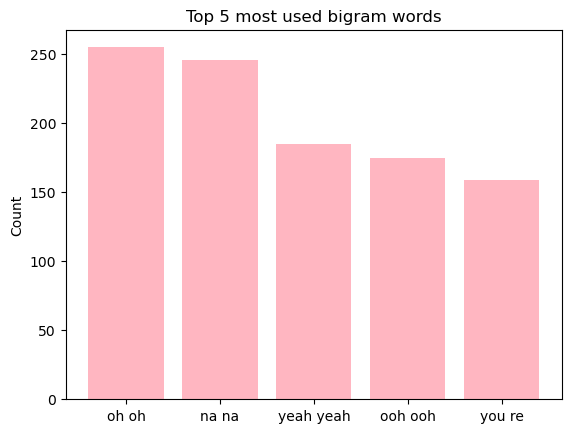

In [234]:
# This method is used to find the top 5 bigram words in the dataset

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(Dataset1['Final_Lyrics'], 5)
df3 = pd.DataFrame(common_words, columns = ['Final_Lyrics' , 'count'])

# This displays the top 5 words with their count in bar plot
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.bar(df3['Final_Lyrics'], df3['count'], align='center',color='lightpink')
plt.xticks(df3.Final_Lyrics)
plt.ylabel('Count')
plt.title('Top 5 most used bigram words')

In [146]:
# convert the lists into string for word cloud creation

def converttostr(input_seq, seperator):
# Join all the strings in list
   final_str = seperator.join(input_seq)
   return final_str

# List of month names separated with a space

seperator = ' '
print("Scenario#1: ", converttostr(Dataset1['Final_Lyrics'], seperator))

text=converttostr(Dataset1['Final_Lyrics'], seperator)

Scenario#1:  I'm sure surpris At road taken caus million live would dream bethlehem channel and stand manger He saw eye the messag angel come life and joseph said choru whi, I'm just simpl man trade whi him ruler world whi insid stabl fill hay whi ,'s just ordinari girl now I'm second guess what angel say but strang way save world To think If jesu come He deserv there bethlehem No lowli shepherd hi birth channel but joseph knew reason love reach far and held savior arm He thought repeat choru now, I'm second guess what angel say but strang way save world such strang way, such strang way A strang way save world A strang way save world yeah, uh-huh So seduct I'll candi shop I'll let lick lollipop Go ahead, girl ,n't stop keep go 'til hit spot, whoaa I'll candi shop boy, tast I got I'll spendin' got keep go 'til hit spot, whoaa you way, want? you gonna thing I push? temperatur rise, okay, let's level danc floor jam-pack, hot tea kettl I break, babi ,'s simpl If nympho, I nympho In hotel r

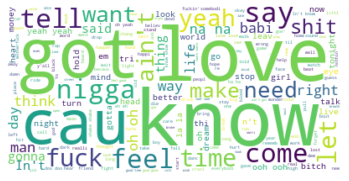

In [147]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

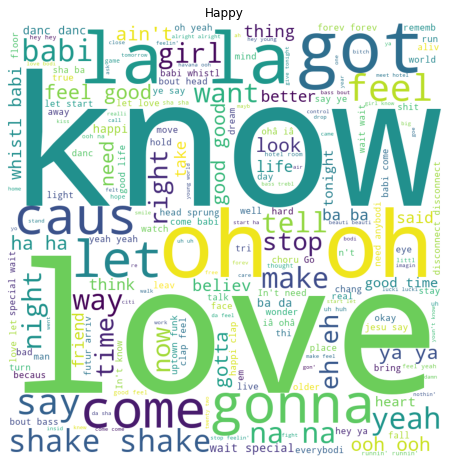

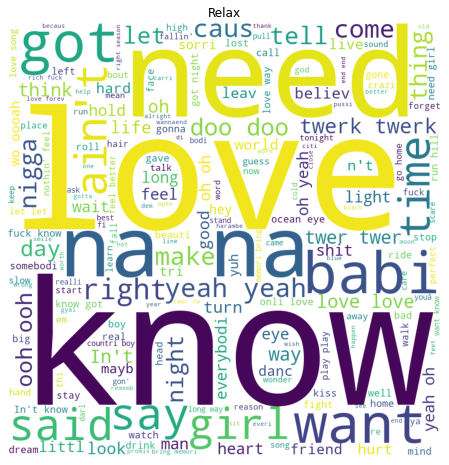

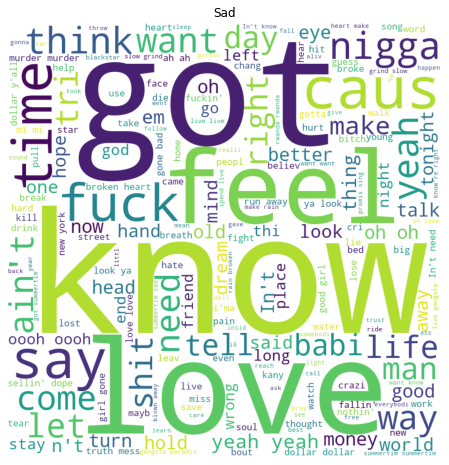

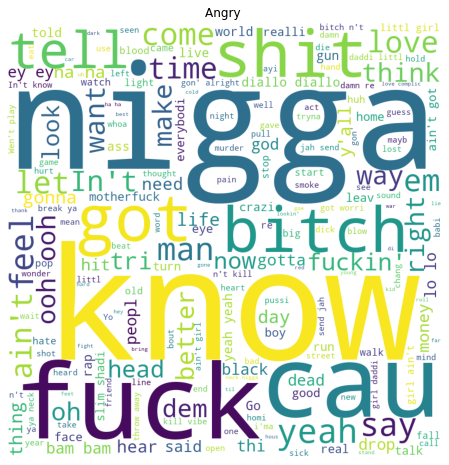

In [158]:
# Mood based WordCloud plot

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

labels = Dataset1['Mood']
unique_labels = labels.unique()
unique_labels
word_dict = dict()
for val in unique_labels:
    sentences = ""
    for l in Dataset1.loc[Dataset1['Mood'] == val]['Final_Lyrics']:
        sentences += " " + l
    word_dict[val] =sentences
for key in word_dict:
    word_cloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 5).generate(word_dict[key])
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.axis("off")
    plt.title(str(key))
    plt.imshow(word_cloud)
    plt.savefig(str(key) + ".png")

In [74]:
# Section - 3 : Lyric Feature Analysis

########################## Latent Semantic Analysis ###############################

In [159]:
# 1) TF-IDF Vectorization : 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r'\S+',max_df=0.90,min_df=2,max_features=1500)
x_traincv = vectorizer.fit_transform(Dataset1['Final_Lyrics'])
x_traincv_df = pd.DataFrame(x_traincv.toarray(),columns=list(vectorizer.get_feature_names()))
x_traincv_df

&   ''  'bout  'bout,     'caus  'caus're  'caus's       'em  \
0    0.000000  0.0    0.0     0.0  0.000000       0.0      0.0  0.000000   
1    0.000000  0.0    0.0     0.0  0.000000       0.0      0.0  0.000000   
2    0.000000  0.0    0.0     0.0  0.000000       0.0      0.0  0.061281   
3    0.000000  0.0    0.0     0.0  0.020063       0.0      0.0  0.053901   
4    0.000000  0.0    0.0     0.0  0.011565       0.0      0.0  0.000000   
..        ...  ...    ...     ...       ...       ...      ...       ...   
395  0.000000  0.0    0.0     0.0  0.000000       0.0      0.0  0.000000   
396  0.037753  0.0    0.0     0.0  0.000000       0.0      0.0  0.000000   
397  0.000000  0.0    0.0     0.0  0.000000       0.0      0.0  0.000000   
398  0.000000  0.0    0.0     0.0  0.000000       0.0      0.0  0.000000   
399  0.000000  0.0    0.0     0.0  0.000000       0.0      0.0  0.000000   

     'em,  'ey  ...  your  youâ  youâ€™r  yuh  zone         â  â€˜caus  \
0     0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   
1     0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.109869      0.0   
2     0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   
3     0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   
4     0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   
..    ...  ...  ...   ...   ...      ...  ...   ...       ...      ...   
395   0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   
396   0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   
397   0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   
398   0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   
399   0.0  0.0  ...   0.0   0.0      0.0  0.0   0.0  0.000000      0.0   

            ‘         ’    ”  
0    0.000000  0.000000  0.0  
1    0.091877  0.000000  0.0  
2    0.180472  0.038399  0.0  
3    0.000000  0.000000  0.0  
4    0.000000  0.000000  0.0  
..        ...       ...  ...  
395  0.000000  0.000000  0.0  
396  0.000000  0.000000  0.0  
397  0.000000  0.000000  0.0  
398  0.000000  0.435642  0.0  
399  0.000000  0.000000  0.0  

[400 rows x 1500 columns]

In [160]:
# Splitting the data into Training and Text Set

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [161]:
# Assigning the values of X and Y

X = x_traincv_df
Y = Dataset1['Mood']

In [162]:
# Splitting the data into the ratio of 70% and 30%

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100,stratify=Y)

In [163]:
# Applying 10 fold cross validation with entire dataset for training purpose hence training score will be generated for MLP

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Algorithm is trained

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)

# Accuracy scores of all the parts are averaged

print(cross_val_score(clf, X, Y, cv=10, scoring='accuracy').mean())

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10

0.39249999999999996


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [164]:
# As the data is split into training and test set testing score is generated for MLP

from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# create mutli-layer perceptron classifier

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)

# train
grid_result = clf.fit(X_train,y_train)

#predict
y_pred_mlp=grid_result.predict(X_test)

# Accuracy Calculation
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_mlp))

Accuracy:  0.4


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [165]:
# Cross Validation with Logistic Regression on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# LR is trained 
logreg = LogisticRegression(C=2.5,max_iter=140)

# Accuracy is averaged 
print(cross_val_score(logreg, X, Y, cv=10, scoring='accuracy').mean())

0.395


In [166]:
# Logistic Regression with testing score

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

dual=[True,False]
max_iter=[140]
C = [2.5]

# parametering tuning is carried out using grid search 
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
logistic_regression= GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid)
grid_result = logistic_regression.fit(X_train,y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
y_pred_lr=logistic_regression.predict(X_test)

# Accuracy Calculation
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_lr))

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver lbfgs supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. T

Best: 0.432143 using {'C': 2.5, 'dual': False, 'max_iter': 140}
Accuracy:  0.425


In [235]:
# Cross Validation with Decision Tree on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# training the DCT model
dct = DecisionTreeClassifier(max_depth=180,max_features=1000)

# Averaging the accuracy
print(cross_val_score(dct, X, Y, cv=10, scoring='accuracy').mean())

0.305


In [236]:
# Decision Tree with testing score

from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [180],
    'max_features': [1000]
}

decisiontree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
decisiontreeresult = decisiontree.fit(X_train,y_train)

# Summarize results
print("Best: %f using %s" % (decisiontreeresult.best_score_, decisiontreeresult.best_params_))
y_pred_decisiontree = decisiontree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decisiontree))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


Best: 0.310714 using {'max_depth': 180, 'max_features': 1000}
Accuracy: 0.2916666666666667


In [169]:
# Cross Validation with Gaussian NB on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
# Training the GNB model
gnb = GaussianNB()
# averaging the scores
print(cross_val_score(gnb, X, Y, cv=10, scoring='accuracy').mean())

0.3


In [170]:
# Gaussian NB with testing score

from sklearn.naive_bayes import GaussianNB

# Creating the classifier

gnb = GaussianNB()

# training the model

gnb.fit(X_train, y_train)
# predicting the output values
y_predgnb = gnb.predict(X_test)
# calculating the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_predgnb))

Accuracy: 0.38333333333333336


In [171]:
# Cross Validation with Bernoulli on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

# Training the BNB model
bnb = BernoulliNB(alpha=0.1)
# averaging the scores
print(cross_val_score(bnb, X, Y, cv=10, scoring='accuracy').mean())

0.425


In [172]:
# Bernoulli Testing Score with testing score

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=0.1)
bnb.fit(X_train, y_train)
y_predbnb = bnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predbnb))

Accuracy: 0.48333333333333334


In [173]:
# Cross Validation with RandomForest on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)
print(cross_val_score(rf, X, Y, cv=10, scoring='accuracy').mean())

0.3925


In [174]:
# RandomForest with testing score

from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [160],
    'max_features': [200],
    'n_estimators': [100]
}

rf=GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid,
                           n_jobs = -1, verbose = 2)
rfresult=rf.fit(X_train,y_train)

# print("Best: %f using %s" % (rfresult.best_score_, rfresult.best_params_))

y_predrf=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


Accuracy: 0.43333333333333335


In [177]:
# 2) Count Vectorization : 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_countv = CountVectorizer(token_pattern=r'\S+',max_df=0.90,min_df=2,max_features=1500)
x_train_countvec = vectorizer_countv.fit_transform(Dataset1['Final_Lyrics'])
x_train_countvec_df = pd.DataFrame(x_train_countvec.toarray(),columns=list(vectorizer_countv.get_feature_names()))
x_train_countvec_df

&  ''  'bout  'bout,  'caus  'caus're  'caus's  'em  'em,  'ey  ...  \
0    0   0      0       0      0         0        0    0     0    0  ...   
1    0   0      0       0      0         0        0    0     0    0  ...   
2    0   0      0       0      0         0        0    2     0    0  ...   
3    0   0      0       0      1         0        0    2     0    0  ...   
4    0   0      0       0      1         0        0    0     0    0  ...   
..  ..  ..    ...     ...    ...       ...      ...  ...   ...  ...  ...   
395  0   0      0       0      0         0        0    0     0    0  ...   
396  1   0      0       0      0         0        0    0     0    0  ...   
397  0   0      0       0      0         0        0    0     0    0  ...   
398  0   0      0       0      0         0        0    0     0    0  ...   
399  0   0      0       0      0         0        0    0     0    0  ...   

     your  youâ  youâ€™r  yuh  zone  â  â€˜caus  ‘   ’  ”  
0       0     0        0    0     0  0        0  0   0  0  
1       0     0        0    0     0  2        0  2   0  0  
2       0     0        0    0     0  0        0  4   1  0  
3       0     0        0    0     0  0        0  0   0  0  
4       0     0        0    0     0  0        0  0   0  0  
..    ...   ...      ...  ...   ... ..      ... ..  .. ..  
395     0     0        0    0     0  0        0  0   0  0  
396     0     0        0    0     0  0        0  0   0  0  
397     0     0        0    0     0  0        0  0   0  0  
398     0     0        0    0     0  0        0  0  12  0  
399     0     0        0    0     0  0        0  0   0  0  

[400 rows x 1500 columns]

In [178]:
# Splitting the data into Training and Text Set

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [179]:
# Assigning the values of X and Y

X1 = x_train_countvec_df
Y1 = Dataset1['Mood']

In [180]:
# Splitting the data into the ratio of 70% and 30%

X1_train, X1_test, y1_train, y1_test = train_test_split( X1, Y1, test_size = 0.3, random_state = 100,stratify=Y1)

In [181]:
# Applying 10 fold cross validation with entire dataset for training purpose hence training score will be generated for MLP

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Algorithm is trained 

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)

# Accuracy scores of all the parts are averaged

print(cross_val_score(clf, X1, Y1, cv=10, scoring='accuracy').mean())

0.36500000000000005


In [182]:
# As the data is split into training and test set testing score is generated for MLP

# create mutli-layer perceptron classifier

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)

# train
grid_result = clf.fit(X1_train,y1_train)
y_pred_mlp=grid_result.predict(X1_test)

# Accuracy Calculation
print('Accuracy: ',metrics.accuracy_score(y1_test, y_pred_mlp))

Accuracy:  0.38333333333333336


In [183]:
# Cross Validation with Logistic Regression on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=2.5,max_iter=140)
print(cross_val_score(logreg, X1, Y1, cv=10, scoring='accuracy').mean())

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

0.3625


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression= LogisticRegression(C=2.5,max_iter=140)
logistic_regression.fit(X1_train,y1_train)
y_pred_lr=logistic_regression.predict(X1_test)

# Accuracy Calculation
print('Accuracy: ',metrics.accuracy_score(y1_test, y_pred_lr))

Accuracy:  0.36666666666666664


In [185]:
# Cross Validation with Decision Tree on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=180,max_features=1000)
print(cross_val_score(dct, X1, Y1, cv=10, scoring='accuracy').mean())

0.315


In [205]:
# Decision Tree with testing score

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

decisiontree = DecisionTreeClassifier(max_depth=180,max_features=1000,criterion="entropy")
decisiontree = decisiontree.fit(X1_train,y1_train)
y_pred_decisiontree = decisiontree.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y_pred_decisiontree))

Accuracy: 0.3416666666666667


In [206]:
# Cross Validation with Gaussian NB on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
print(cross_val_score(gnb, X1, Y1, cv=10, scoring='accuracy').mean())

0.3075


In [207]:
# Gaussian NB with testing score

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()

gnb.fit(X1_train,y1_train)

y_predgnb = gnb.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y_predgnb))

Accuracy: 0.39166666666666666


In [208]:
# Cross Validation with RandomForest on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)
print(cross_val_score(rf, X1, Y1, cv=10, scoring='accuracy').mean())

0.39249999999999996


In [209]:
# RandomForest with testing score

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf=RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)

rf.fit(X1_train,y1_train)

y_predrf=rf.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y_predrf))

Accuracy: 0.4166666666666667


In [210]:
# Cross Validation with Bernoulli on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.1)
print(cross_val_score(bnb, X1, Y1, cv=10, scoring='accuracy').mean())

0.425


In [211]:
# Bernoulli with testing score

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bnb = BernoulliNB(alpha=0.1)

bnb.fit(X1_train,y1_train)
y_predbnb = bnb.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y_predbnb))

Accuracy: 0.48333333333333334


In [212]:
# 3) Hashing Vectorization:

from sklearn.feature_extraction.text import HashingVectorizer

vectorizer_hash = HashingVectorizer(n_features=3000,alternate_sign=False)
x_train_hash = vectorizer_hash.fit_transform(Dataset1['Final_Lyrics'])
x_train_hash_df = pd.DataFrame(x_train_hash.toarray())
x_train_hash_df

0     1     2     3     4     5     6     7     8     9     ...  2990  \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
395   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
396   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
397   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
398   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
399   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     2991  2992  2993  2994      2995      2996  2997  2998  2999  
0     0.0   0.0   0.0   0.0  0.121491  0.000000   0.0   0.0   0.0  
1     0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
2     0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
3     0.0   0.0   0.0   0.0  0.000000  0.027907   0.0   0.0   0.0  
4     0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
..    ...   ...   ...   ...       ...       ...   ...   ...   ...  
395   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
396   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
397   0.0   0.0   0.0   0.0  0.120550  0.000000   0.0   0.0   0.0  
398   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  
399   0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  

[400 rows x 3000 columns]

In [213]:
# Splitting the data into Training and Text Set

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [214]:
# Assigning the values of X and Y

X2 = x_train_hash_df
Y2 = Dataset1['Mood']

In [215]:
# Splitting the data into the ratio of 70% and 30%

X2_train, X2_test, y2_train, y2_test = train_test_split( X2, Y2, test_size = 0.3, random_state = 100,stratify=Y2)

In [216]:
# Applying 10 fold cross validation with entire dataset for training purpose hence training score will be generated for MLP

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Algorithm is trained 
clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)
# Accuracy scores of all the parts are averaged
print(cross_val_score(clf, X2, Y2, cv=10, scoring='accuracy').mean())

c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10

0.4


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [217]:
# As the data is split into training and test set testing score is generated for MLP

# create mutli-layer perceptron classifier

clf = MLPClassifier(solver='adam',activation='logistic',hidden_layer_sizes=(100,),alpha=0.1,learning_rate='constant',max_iter=1000)
# train
grid_result = clf.fit(X2_train,y2_train)
y_pred_mlp=grid_result.predict(X2_test)
# Accuracy Calculation
print('Accuracy: ',metrics.accuracy_score(y2_test, y_pred_mlp))

Accuracy:  0.4166666666666667


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [218]:
# Cross Validation with Logistic Regression on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=2.5,max_iter=140)
print(cross_val_score(logreg, X2, Y2, cv=10, scoring='accuracy').mean())

0.4375


In [219]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression= LogisticRegression(C=2.5,max_iter=140)
logistic_regression.fit(X2_train,y2_train)
y_pred_lr=logistic_regression.predict(X2_test)

# Accuracy Calculation

print('Accuracy: ',metrics.accuracy_score(y2_test, y_pred_lr))

Accuracy:  0.4583333333333333


In [220]:
# Cross Validation with Decision Tree on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=180,max_features=1000)
print(cross_val_score(dct, X2, Y2, cv=10, scoring='accuracy').mean())

0.3275


In [221]:
# Decision Tree with testing score

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

decisiontree = DecisionTreeClassifier(max_depth=180,max_features=1000,criterion="entropy")

decisiontree = decisiontree.fit(X2_train,y2_train)
y_pred_decisiontree = decisiontree.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_decisiontree))

Accuracy: 0.3


In [237]:
# Cross Validation with Gaussian NB on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
print(cross_val_score(gnb, X2, Y2, cv=10, scoring='accuracy').mean())

0.28500000000000003


In [238]:
# Gaussian NB with testing score

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()

gnb.fit(X2_train,y2_train)

y_predgnb = gnb.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y_predgnb))

Accuracy: 0.2833333333333333


In [224]:
# Cross Validation with RandomForest on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)
print(cross_val_score(rf, X2, Y2, cv=10, scoring='accuracy').mean())

0.43


In [225]:
# RandomForest with testing score

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf=RandomForestClassifier(bootstrap=True,max_depth=160,max_features=200,n_estimators=100)

rf.fit(X2_train,y2_train)
y_predrf=rf.predict(X2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y_predrf))

Accuracy: 0.45


In [226]:
# Cross Validation with Bernoulli on whole data which gives training score

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.1)
print(cross_val_score(bnb, X2, Y2, cv=10, scoring='accuracy').mean())

0.37499999999999994


In [227]:
# Bernoulli with testing score

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bnb = BernoulliNB(alpha=0.1)

bnb.fit(X2_train,y2_train)
y_predbnb = bnb.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y_predbnb))

Accuracy: 0.4666666666666667


In [240]:
# creates a dataframe with the accuracies of each ML algorithm with the vectorizer

dfObj = pd.DataFrame(columns=['Vectorizer', 'Algorithm', 'Accuracy'])
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'MLP','Accuracy':40.00}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'LR','Accuracy':42.05}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'DCT','Accuracy':30.45}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'GNB','Accuracy':38.33}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'BNB','Accuracy':48.30}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'TF-IDF Vectroizer','Algorithm':'RF','Accuracy':43.33}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'MLP','Accuracy':38.83}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'LR','Accuracy':36.66}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'DCT','Accuracy':34.40}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'GNB','Accuracy':39.16}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'BNB','Accuracy':48.30}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Count Vectroizer','Algorithm':'RF','Accuracy':41.60}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'MLP','Accuracy':41.60}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'LR','Accuracy':45.8}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'DCT','Accuracy':30.00}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'GNB','Accuracy':28.30}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'BNB','Accuracy':46.60}, ignore_index=True)
dfObj = dfObj.append({'Vectorizer':'Hash Vectroizer','Algorithm':'RF','Accuracy':45.00}, ignore_index=True)

In [243]:
print("Dataframe Contens ", dfObj, sep='\n')

Dataframe Contens 
           Vectorizer Algorithm  Accuracy
0   TF-IDF Vectroizer       MLP     40.00
1   TF-IDF Vectroizer        LR     42.05
2   TF-IDF Vectroizer       DCT     30.45
3   TF-IDF Vectroizer       GNB     38.33
4   TF-IDF Vectroizer       BNB     48.30
5   TF-IDF Vectroizer        RF     43.33
6    Count Vectroizer       MLP     38.83
7    Count Vectroizer        LR     36.66
8    Count Vectroizer       DCT     34.40
9    Count Vectroizer       GNB     39.16
10   Count Vectroizer       BNB     48.30
11   Count Vectroizer        RF     41.60
12    Hash Vectroizer       MLP     41.60
13    Hash Vectroizer        LR     45.80
14    Hash Vectroizer       DCT     30.00
15    Hash Vectroizer       GNB     28.30
16    Hash Vectroizer       BNB     46.60
17    Hash Vectroizer        RF     45.00


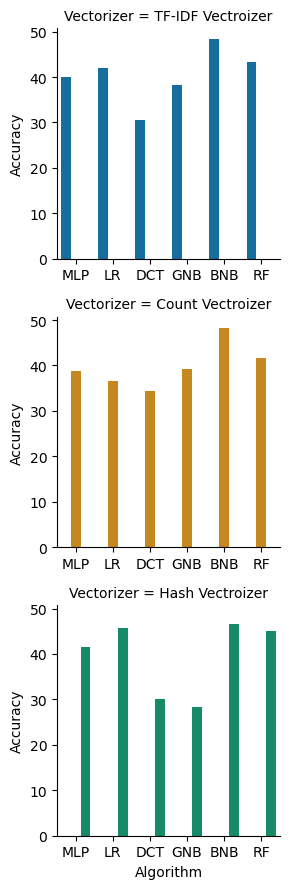

In [242]:
# Displays the results of Algorithm vs Accuracy in bar plot

import seaborn as sns

sns.factorplot(x='Algorithm', y='Accuracy', hue='Vectorizer', data=dfObj, kind='bar',row="Vectorizer",size=3,sharex='row'
               ,palette='colorblind')

In [ ]:
                ################### Content Based Analysis (Bag of Words) ####################

In [1]:
#Import all the necessary packages for classification problem

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from nltk.tokenize import WordPunctTokenizer
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gagan Rangu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
CBA = pd.read_csv('C:/Users/Gagan Rangu/Desktop/Mood Classification/SongLyrics.csv', encoding='cp1252')

In [57]:
#Converting Lyrics column to String datatype 

CBA['Lyrics'].astype(str)
CBA['Lyrics'].head(5)

0    I'm sure he must have been surprised\nAt where...
1    Yeah, uh-huh\nSo seductive\n\nI'll take you to...
2    My life, my life\nMakes me wanna run away\nThe...
3    Yeah, ha ha, yeah, yeah\n\nIf I can't do it, h...
4    G-Unit (BO!), we in here (BO!)\nWe can get the...
Name: Lyrics, dtype: object

In [52]:
# Removing all rows having any blank cells
CBA=CBA.dropna(axis=0)
CBA = CBA.reset_index(drop=True)

In [53]:
# Replacing the data havinh white space and blank with NAN
CBA['Lyrics'].replace('', np.nan, inplace=True)
CBA['Lyrics'].replace(' ', np.nan, inplace=True)
print(CBA)

     Track_Id        Artist    Genre                          Title  \
0           1          4Him      Pop  Strange Way To Save The World   
1           2       50 Cent  Hip-Hop                     Candy Shop   
2           3       50 Cent  Hip-Hop                        My Life   
3           4       50 Cent  Hip-Hop                    If I Cannot   
4           5       50 Cent  Hip-Hop                What Up Gangsta   
..        ...           ...      ...                            ...   
395       398  XXXTentacion  Hip-Hop                            Sad   
396       399  XXXTentacion  Hip-Hop                      Moonlight   
397       400  Zara Larsson      Pop                      Lush Life   
398       401  Ziggy Marley   Reggae                     Lighthouse   
399       402  Sister Hazel     Rock                 Vacation Rain    

                                                Lyrics    Mood  
0    I'm sure he must have been surprised\nAt where...   Happy  
1    Yeah, uh-huh

In [55]:
#Finding Missing Values

for col in CBA.columns:
    print(col, CBA[col].isnull().sum())

Track_Id 0
Artist 0
Genre 0
Title 0
Lyrics 0
Mood 0


In [56]:
CBA['Mood'].value_counts()

Sad       114
Happy     103
Relax      92
Angry      91
Name: Mood, dtype: int64

In [59]:
# Converting the Lyrics column datatype to string
CBA['Lyrics'] = CBA['Lyrics'].astype(str)

In [60]:
# Assigning the values of A and B

A = CBA['Lyrics']
B = CBA['Mood']

In [61]:
# Defining n-gram models - Unigram , Bigram , Trigram
# Defining combibation of Unigram + Bigram , Bigram + Trigram , Unigram + Bigram + Trigram

n_gram_pipeline = dict()
n_gram_pipeline['Unigram'] = (1, 1)
n_gram_pipeline['Bigram'] = (2, 2)
n_gram_pipeline['Trigram'] = (3, 3)
n_gram_pipeline['Unigram + Bigram'] = (1, 2)
n_gram_pipeline['Bigram + Trigram'] = (1, 1)
n_gram_pipeline['Unigram + Bigram  + Trigram'] = (1, 3)

In [62]:
# Defining TF-IDF vectorization to convert lyrics into feature Vectors

n_gram_tfidf_features_pipeline = dict()
for features in n_gram_pipeline.keys():
        n_gram_tfidf_features_pipeline[features] = TfidfVectorizer(min_df=3, max_features=3000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w{3,}', ngram_range=n_gram_pipeline[features],
                            use_idf=True,smooth_idf=True, sublinear_tf=True, stop_words = "english")
        n_gram_tfidf_features_pipeline[str(features) + " + POS"] = TfidfVectorizer(min_df=3, max_features=3000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w{3,}', ngram_range=n_gram_pipeline[features],
                            use_idf=True,smooth_idf=True, sublinear_tf=True, stop_words = "english", tokenizer=POSTogging())

In [63]:
# Spliting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state = 42)

In [64]:
# Classifiers: LinearSVC, Logistic Regression, Decision Tree, Random Forest and Multi-layer Perceptron and create a pipeline

models_pipeline = dict()
models_pipeline['Linear SVC'] = LinearSVC(random_state=0, tol=1e-5)
models_pipeline['Logistic Regression'] = LogisticRegression(solver='lbfgs', multi_class='auto')
models_pipeline['Decision Tree'] = DecisionTreeClassifier(max_depth=5)
models_pipeline['Random Forest'] = RandomForestClassifier(max_depth=5, n_estimators=10)
models_pipeline['MLP (ANN)'] = MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1500)

In [65]:
# Confusion Matrix

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Ref: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout(pad=5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model : Features : Model Accuracy : 5-fold cross-validation mean accuracy
Linear SVC :Unigram :0.49 :0.45 (+/- 0.08)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Unigram + POS :0.42 :0.45 (+/- 0.10)
Linear SVC :Bigram :0.32 :0.31 (+/- 0.09)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Bigram + POS :0.43 :0.42 (+/- 0.07)
Linear SVC :Trigram :0.22 :0.31 (+/- 0.07)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Trigram + POS :0.35 :0.39 (+/- 0.10)
Linear SVC :Unigram + Bigram :0.45 :0.46 (+/- 0.13)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Unigram + Bigram + POS :0.42 :0.45 (+/- 0.13)
Linear SVC :Bigram + Trigram :0.49 :0.45 (+/- 0.08)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Bigram + Trigram + POS :0.42 :0.45 (+/- 0.10)
Linear SVC :Unigram + Bigram  + Trigram :0.46 :0.46 (+/- 0.14)


c:\users\gagan rangu\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a/DT', 'about/IN', 'above/IN', 'across/IN', 'after/IN', 'afterwards/NNS', 'again/RB', 'against/IN', 'all/DT', 'almost/RB', 'alone/RB', 'along/IN', 'already/RB', 'also/RB', 'although/IN', 'always/RB', 'am/VBP', 'among/IN', 'amongst/NN', 'amoungst/NN', 'amount/NN', 'an/DT', 'and/CC', 'another/DT', 'any/DT', 'anyhow/NN', 'anyone/NN', 'anything/NN', 'anyway/RB', 'anywhere/RB', 'are/VBP', 'around/IN', 'as/IN', 'at/IN', 'back/RB', 'be/VB', 'became/VBD', 'because/IN', 'become/NN', 'becomes/NNS', 'becoming/VBG', 'been/VBN', 'before/IN', 'beforehand/NN', 'behind/IN', 'being/VBG', 'below/IN', 'beside/NN', 'besides/IN', 'between/IN', 'beyond/IN', 'bill/NN', 'both/DT', 'bottom/NN', 'but/CC', 'by/IN', 'call/NN', 'can/MD', 'cannot/NN', 'cant/NN', 'co/NN', 'con/NN', '

Linear SVC :Unigram + Bigram  + Trigram + POS :0.47 :0.45 (+/- 0.08)
Logistic Regression :Unigram :0.40 :0.45 (+/- 0.15)
Logistic Regression :Unigram + POS :0.39 :0.44 (+/- 0.11)
Logistic Regression :Bigram :0.25 :0.32 (+/- 0.03)
Logistic Regression :Bigram + POS :0.37 :0.45 (+/- 0.07)
Logistic Regression :Trigram :0.22 :0.31 (+/- 0.07)
Logistic Regression :Trigram + POS :0.33 :0.39 (+/- 0.05)
Logistic Regression :Unigram + Bigram :0.40 :0.44 (+/- 0.14)
Logistic Regression :Unigram + Bigram + POS :0.40 :0.46 (+/- 0.12)
Logistic Regression :Bigram + Trigram :0.40 :0.45 (+/- 0.15)
Logistic Regression :Bigram + Trigram + POS :0.39 :0.44 (+/- 0.11)
Logistic Regression :Unigram + Bigram  + Trigram :0.40 :0.43 (+/- 0.15)
Logistic Regression :Unigram + Bigram  + Trigram + POS :0.39 :0.47 (+/- 0.12)
Decision Tree :Unigram :0.34 :0.36 (+/- 0.07)
Decision Tree :Unigram + POS :0.32 :0.30 (+/- 0.07)
Decision Tree :Bigram :0.23 :0.31 (+/- 0.01)
Decision Tree :Bigram + POS :0.32 :0.29 (+/- 0.06)
Dec

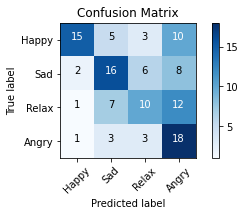

In [66]:
# fit and transform the data, predict the accuracy from different classifiers

print("Model : Features : Model Accuracy : 5-fold cross-validation mean accuracy")
best_model_y_pred = list()
best_accuracy = 0
text_file = open("model_results.txt","w+")
for models in models_pipeline.keys():
    for tfv in n_gram_tfidf_features_pipeline.keys():
        pipeline = make_pipeline(n_gram_tfidf_features_pipeline[tfv], models_pipeline[models])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        tf_idf_vectorizer = n_gram_tfidf_features_pipeline[tfv]
        X_tf_idf = tf_idf_vectorizer.fit_transform(A)
        scores = cross_val_score(models_pipeline[models], X_tf_idf, B, cv=5)
        k_fold_mean_accuracy = ("%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        test_accuracy = accuracy_score(y_pred, y_test)
        test_accuracy_formatted = ("%0.2f" % (test_accuracy))
        stream = str(models) + " :" + str(tfv) + " :" + str(test_accuracy_formatted) + " :" + str(k_fold_mean_accuracy)
        print(stream)
        text_file.write(stream + "\n")
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model_y_pred = y_pred
text_file.close()
cnf_matrix = confusion_matrix(y_test, best_model_y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Happy', 'Sad', 'Relax', 'Angry'], title='Confusion Matrix')
plt.savefig("cm.png", dpi=500)
plt.show()